# Quick Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from pandas import DataFrame
from seaborn import pointplot, set_style

# Constante
LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000]) // 10

# evitar estouro da pilha de chamadas
import sys
pior_caso = LISTA_DE_TAMANHOS.max() ** 2
if pior_caso > sys.getrecursionlimit():
  sys.setrecursionlimit(int(1.2 * pior_caso))


## Algoritmo

In [2]:
def quick(arr:'np.ndarray[float]', start:int=0, stop:int=None) -> None:
  '''
  Quick Sort
  ---
  Ordena o arr recursivamente de forma crescente.
  A cada chamada, define `pivo` como sendo o ultimo elemento do
  slice `arr[start, stop]` e agrupa no início dele os elementos que
  são menores que ele, depois repete o processo recursivamente para
  os slices menores e maiores do que o `pivo`.
  
  * OBS: definir limite de recursividade para algo pouco maior que
  `len(arr) ** 2` para não estourar a pilha de recursividade no pior
  caso:

  ```python
  from sys import setrecursionlimit
  setrecursionlimit(int(1.1 * len(arr)**2))
  ```
  '''
  stop = stop if stop is not None else len(arr)
  i = start
  if i < stop:
    pivo = arr[stop-1]
    # agrupa os elementos menores que o pivô no início no array
    for j in range(start, stop):
      if arr[j] < pivo:
        arr[j], arr[i] = arr[i], arr[j]
        i += 1
  
    # posiciona o pivô na posição i separando os grupos de menores e maiores que ele
    arr[i], arr[stop-1] = arr[stop-1], arr[i]

    # repete o processo recursivamente
    quick(arr, start, i)
    quick(arr, i+1, stop)


## Bateria de testes de desempenho

In [3]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=float)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=float)[::-1].copy()
    else:
      amostra = np.random.sample(tamanho)
    
    # testando performance
    start = perf_counter()
    quick(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.003913,0.000854,0.003667,100
0.031485,0.001397,0.008777,200
0.049198,0.002247,0.026848,300
0.083324,0.003672,0.049187,400
0.109563,0.004998,0.106682,500
0.268179,0.006854,0.325353,800
0.540081,0.010944,0.458909,1100
1.066019,0.012118,0.648077,1500


## Resultados

O pior caso é quando a lista se encontra ordenada de forma crescente


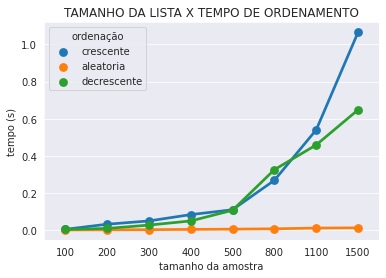

In [4]:
# Remodela o dataframe para uma versão longa mais fácil de plotar
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')